<a href="https://colab.research.google.com/github/gustavopierre/personality_trait/blob/main/api/machinelearning/notebook/personality_trait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/syncoraai/extrovert-vs-introvert-personality-traits-dataset/data
https://www.kaggle.com/code/satriahelmy/extrovert-vs-introvert

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier
import pickle

In [4]:
url = "https://raw.githubusercontent.com/gustavopierre/personality_trait/refs/heads/main/api/machinelearning/data/data.csv"
df = pd.read_csv(url)
df.shape

(4998, 8)

In [5]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           4998 non-null   float64
 1   Stage_fear                 4998 non-null   int64  
 2   Social_event_attendance    4998 non-null   float64
 3   Going_outside              4998 non-null   float64
 4   Drained_after_socializing  4998 non-null   int64  
 5   Friends_circle_size        4998 non-null   float64
 6   Post_frequency             4998 non-null   float64
 7   Personality                4998 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 312.5 KB


In [7]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,4.0,7.0,0,13.0,4.0,0
1,1.0,0,4.0,4.0,0,11.0,5.0,0
2,4.0,1,3.0,1.0,1,3.0,1.0,1
3,6.0,1,0.0,2.0,1,1.0,0.0,1
4,-0.0,0,4.0,6.0,0,13.0,5.0,0


In [8]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 3 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:7]
y = array[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [9]:
y_train

array([0., 0., 0., ..., 1., 0., 0.], shape=(3998,))

LR: 0.927461 (0.008899)
KNN: 0.938966 (0.012338)
CART: 0.927966 (0.012179)
NB: 0.937217 (0.011051)
SVM: 0.937217 (0.011051)
Bagging: 0.944721 (0.011813)
RF: 0.948222 (0.010505)
ET: 0.948722 (0.011094)
Ada: 0.928714 (0.009109)
GB: 0.936967 (0.011182)
Voting: 0.936717 (0.011639)


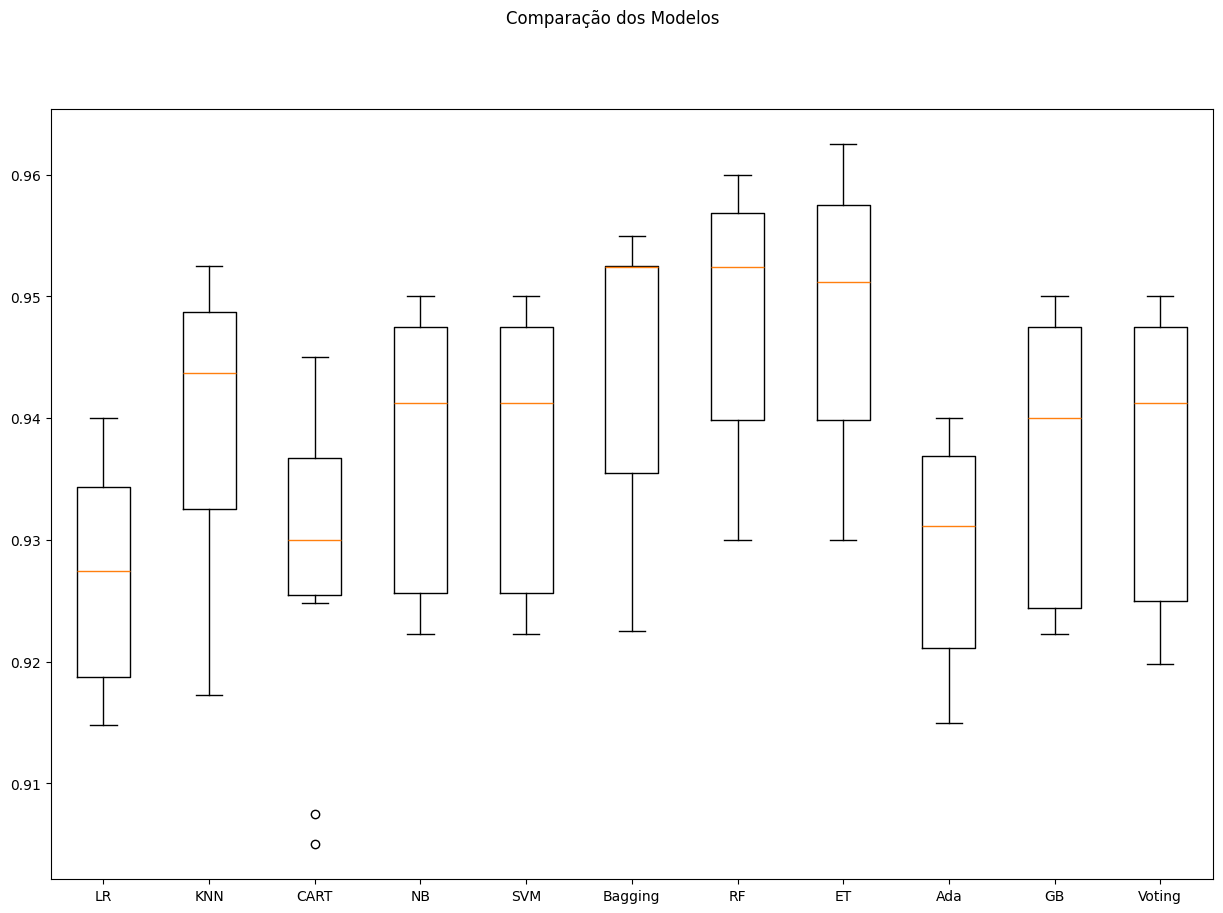

In [9]:
np.random.seed(3) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-orig: 0.927 (0.009)
KNN-orig: 0.939 (0.012)
CART-orig: 0.928 (0.012)
NB-orig: 0.937 (0.011)
SVM-orig: 0.937 (0.011)
Bag-orig: 0.945 (0.012)
RF-orig: 0.948 (0.011)
ET-orig: 0.949 (0.011)
Ada-orig: 0.929 (0.009)
GB-orig: 0.937 (0.011)
Vot-orig: 0.937 (0.012)
LR-padr: 0.925 (0.009)
KNN-padr: 0.941 (0.009)
CART-padr: 0.925 (0.012)
NB-padr: 0.937 (0.011)
SVM-padr: 0.937 (0.011)
Bag-padr: 0.945 (0.013)
RF-padr: 0.948 (0.009)
ET-padr: 0.949 (0.012)
Ada-padr: 0.929 (0.009)
GB-padr: 0.937 (0.011)
Vot-padr: 0.937 (0.012)
LR-norm: 0.928 (0.009)
KNN-norm: 0.942 (0.008)
CART-norm: 0.924 (0.012)
NB-norm: 0.937 (0.011)
SVM-norm: 0.937 (0.011)
Bag-norm: 0.943 (0.012)
RF-norm: 0.948 (0.011)
ET-norm: 0.948 (0.011)
Ada-norm: 0.929 (0.009)
GB-norm: 0.937 (0.011)
Vot-norm: 0.937 (0.012)


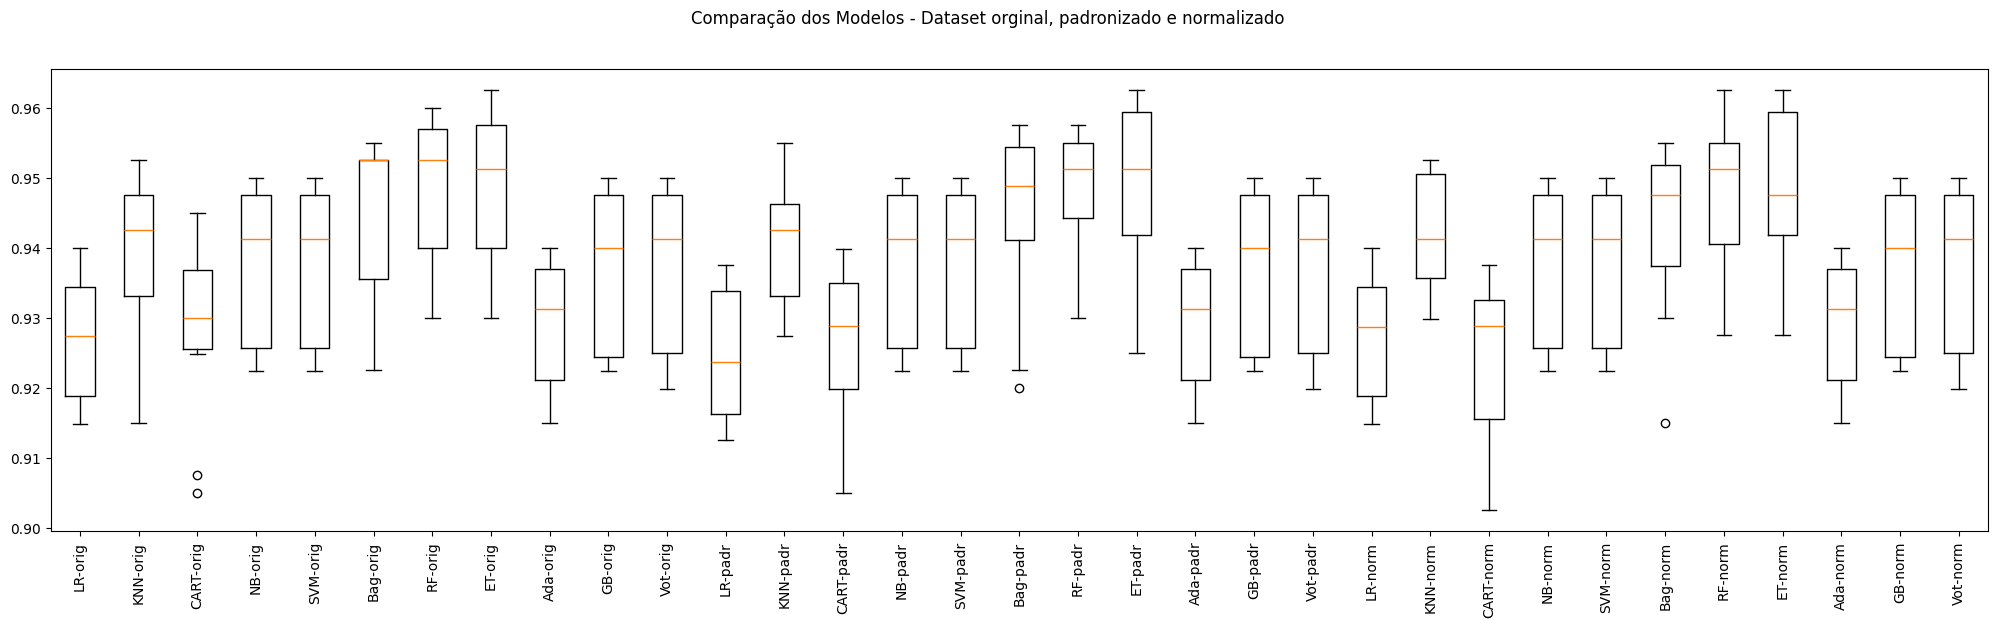

In [ ]:
np.random.seed(3) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
np.random.seed(3)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

#It took 53min


Modelo: LR-orig - Melhor: 0.937217 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.937217 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.937217 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.939719 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Modelo: KNN-padr - Melhor: 0.938719 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: KNN-norm - Melhor: 0.938219 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: CART-orig - Melhor: 0.930715 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: CART-padr - Melhor: 0.930465 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.930465 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: NB-orig - Melhor: 0.937217 usando {'NB__var_smoothing': 1e-09}
Modelo: 

Finalizacao do Modelo

Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [18]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RET-orig - Melhor: 0.948472 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}

np.random.seed(3)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = ExtraTreesClassifier(n_estimators=200,
                             max_features='sqrt',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

model.fit(rescaledX, y_train)
#model.fit(X_train, y_train) # Treinamento do modelo com o conjunto de treino

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
#predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.944


In [19]:
np.random.seed(3)

model = ExtraTreesClassifier(n_estimators=200,
                             max_features='sqrt',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.944


Preparação do modelo com TODO o dataset

In [20]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('ET', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [21]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9823929571828731


Salvando os arquivos

In [24]:
# Salvando o pipeline
pipeline_filename = 'et_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)


Simulando a aplicação do modelo em dados não vistos

In [25]:
# Carregando o pipeline salvo
pipeline_filename = 'et_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)


Previsões para dados não vistos: [1. 1. 1.]


# Criando arquivos de outros modelos

## RF

In [10]:

np.random.seed(3)

model = RandomForestClassifier(n_estimators=100,
                             max_features='log2',
                             max_depth=30,
                             min_samples_split=2,
                             min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.942


In [11]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('ET', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,100
,criterion,'gini'
,max_depth,30
,min_samples_split,2


In [13]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9823929571828731


In [16]:
# Salvando o pipeline
pipeline_filename = 'rf_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [17]:
# Carregando o pipeline salvo
pipeline_filename = 'rf_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 1. 1.]


## GB

In [28]:
np.random.seed(3)

model = GradientBoostingClassifier(n_estimators=100,
                                   max_depth=5,
                                   learning_rate=0.3)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.937


In [29]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('ET', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,loss,'log_loss'
,learning_rate,0.3
,n_estimators,100
,subsample,1.0


In [30]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9707883153261304


In [31]:
# Salvando o pipeline
pipeline_filename = 'gb_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [32]:
# Carregando o pipeline salvo
pipeline_filename = 'gb_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [1. 1. 1.]


## Bagging

In [33]:
np.random.seed(3)

model = BaggingClassifier()

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.943


In [34]:
pipeline.fit(X, y)

,steps,"[('MinMaxScaler', ...), ('ET', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0


In [35]:
predictions = pipeline.predict(X)
print(accuracy_score(y, predictions))

0.9795918367346939


In [36]:
# Salvando o pipeline
pipeline_filename = 'bagging_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [37]:
# Carregando o pipeline salvo
pipeline_filename = 'bagging_personality_trait_pipeline.pkl'
with open("../models/" + pipeline_filename, 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Criando dados de exemplo para simular dados não vistos
# Substitua com os seus dados de exemplo
# Os dados de exemplo devem ter o mesmo formato (número de colunas/features)
# que os dados de treino originais.
# Exemplo: 7 features para prever se é extrovertido ou introvertido
# Aqui, estou criando um exemplo simples com valores aleatórios.
data_not_seen = np.array([
    [0, 1, 2, 2, 1, 0, 4],
    [2, 5, 1, 4, 5, 2, 1],
    [4, 4, 4, 4, 4, 4, 4]
])

# Aplicando o pipeline nos dados não vistos para fazer previsões
predictions_not_seen = loaded_pipeline.predict(data_not_seen)

print("Previsões para dados não vistos:", predictions_not_seen)

Previsões para dados não vistos: [0. 1. 1.]
